# Nigerian Music scraped from Spotify - an analysis

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


We will focus only on 3 genres. Maybe we can get 3 clusters built!

Text(0.5, 1.0, 'Top genres')

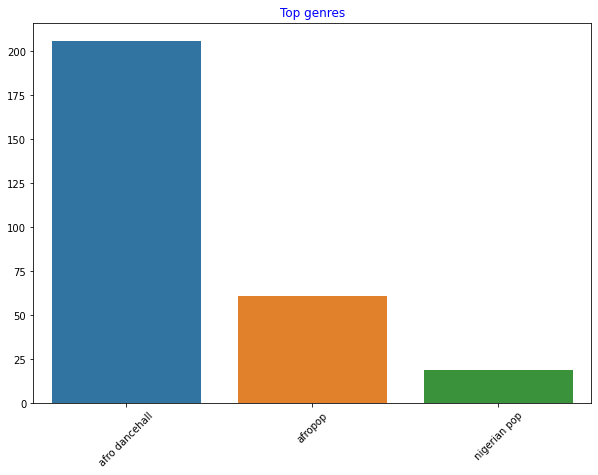

In [3]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [4]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [27]:
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

from sklearn.cluster import AgglomerativeClustering



hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)

print(labels)


score = metrics.silhouette_score(X, labels)
print(score)

[0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1]
0.5319908581200884


Obviously, here we have used one of the Hierarchical Clustering Algorithms (Agglomerative Clustering Algorithm) and we have tried to determine the connection between centroids and samples. Afterward, we found the variety of the data distribution using the score function. 